In [5]:
import sys
!{sys.executable} -m pip install timm --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.6 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 MB 38.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 42.2 MB/s eta 0:00:00
  Using cached PyYAML-6.0-cp311-cp311-macosx_11_0_arm64.whl (167 kB)
  Using cached huggingface_hub-0.14.1-py3-none-any.whl (224 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.4/401.4 kB 22.9 MB/s eta 0:00:00
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 52.9 MB/s eta 0:00:00a 0:00:01
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached fsspec-2023.5.0-py3-none-any.whl (160 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 9.4 MB/s eta 0:00:00
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cached packaging-23.1-py3-none-any.whl (48 kB)
     ━━━━━━━━━━━━━━━━━━━

In [2]:
{sys.executable}

{'/Users/maciej.filanowicz/opt/anaconda3/envs/depth-estimation/bin/python'}

In [1]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from matplotlib import pyplot as plt

In [3]:
# class DepthEstimationDataset(Dataset):
#     def __init__(self, data_dir, split='train', transform=None):
#         self.data_dir = data_dir
#         self.split = split
#         self.transform = transform
#         self.image_dir = os.path.join(self.data_dir, self.split, 'image')
#         self.depth_dir = os.path.join(self.data_dir, self.split, 'depth')
#         self.image_files = sorted(os.listdir(self.image_dir))
#         self.depth_files = sorted(os.listdir(self.depth_dir))
#
#     def __len__(self):
#         return len(self.image_files)
#
#     def __getitem__(self, idx):
#         img_path = os.path.join(self.image_dir, self.image_files[idx])
#         depth_path = os.path.join(self.depth_dir, self.depth_files[idx])
#
#         image = np.load(img_path).astype(np.float32)
#         depth = np.load(depth_path).astype(np.float32)
#
#         if self.transform is not None:
#             image = self.transform(image)
#
#         return {'image': torch.from_numpy(image), 'depth': torch.from_numpy(depth)}

In [3]:
def visualize_batch(batch, n=5, axis=True):
    images, depths = batch['image'], batch['depth']
    fig, ax = plt.subplots(n, 2, figsize=(10,3*n))
    ax[0, 0].set_title('Image')
    ax[0, 1].set_title('Depth')
    for i in range(n):
        image, depth = images[i], depths[i]
        ax[i, 0].imshow(image)
        ax[i, 1].imshow(depth.squeeze(), cmap='gray')
        if not axis:
            ax[i, 0].axis("off")
            ax[i, 1].axis("off")
    plt.show()

In [4]:
def plot_depth_distribution(dataset, drop_zeros=False):
    data_loader = DataLoader(dataset, batch_size=len(dataset))
    for batch in data_loader:
        depths = batch['depth'].flatten()
        if drop_zeros:
            depths = depths[depths != 0]
        plt.hist(np.array(depths), bins=50)
        plt.title('Depth Value Distribution')
        plt.xlabel('Depth Value')
        plt.ylabel('Frequency')
        plt.show()
        return

In [5]:
def plot_image_depth_heatmap(dataset, drop_zeros=False): #basically a 2D histogram
    data_loader = DataLoader(dataset, batch_size=len(dataset))
    for batch in data_loader:
        images, depths = batch['image'], batch['depth']
        image_brightness = images.mean(axis=(-1))
        image_brightness = np.array(image_brightness.flatten())
        depths = np.array(depths.flatten())
        if drop_zeros:
            image_brightness = image_brightness[depths != 0]
            depths = depths[depths != 0]
        heatmap, xedges, yedges = np.histogram2d(image_brightness, depths, bins=20)
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        plt.clf()
        plt.imshow(heatmap.T, extent=extent, origin='lower')
        plt.colorbar()
        plt.title('Heatmap of Image Brightness and Depth Values')
        plt.xlabel('Image Brightness')
        plt.ylabel('Depth Value')
        plt.show()
        return

In [6]:
def print_stats(dataset):
    data_loader = DataLoader(dataset, batch_size=len(dataset))
    for batch in data_loader:
        depths = batch['depth']
        print('Depth value stats:')
        print('-------------------')
        print(f'Minimum depth value: {depths.min():.4f}')
        print(f'Maximum depth value: {depths.max():.4f}')
        print(f'Mean depth value: {depths.mean():.4f}')
        print(f'Standard deviation of depth values: {depths.std():.4f}')
        print()
        images = batch['image']
        images = images.mean(axis=(-1))
        print('Brightness value stats:')
        print('-------------------')
        print(f'Minimum brightness value: {images.min():.4f}')
        print(f'Maximum brightness value: {images.max():.4f}')
        print(f'Mean brightness value: {images.mean():.4f}')
        print(f'Standard deviation of brightness values: {images.std():.4f}')
        return

In [7]:
train_dataset = DepthEstimationDataset('data', split='train')
train_dataloader = DataLoader(train_dataset, batch_size=2975, shuffle=True)

# access one batch of data
batch = next(iter(train_dataloader))
images, depths = batch['image'], batch['depth']

In [8]:
print(len(train_dataset))
print(len(DepthEstimationDataset('data', split='val')))

2975
500


In [9]:
images.shape

torch.Size([2975, 128, 256, 3])

In [10]:
depths.shape

torch.Size([2975, 128, 256, 1])

In [11]:
print_stats(train_dataset)

Depth value stats:
-------------------
Minimum depth value: 0.0000
Maximum depth value: 0.4922
Mean depth value: 0.1137
Standard deviation of depth values: 0.1126

Brightness value stats:
-------------------
Minimum brightness value: 0.0000
Maximum brightness value: 1.0000
Mean brightness value: 0.2988
Standard deviation of brightness values: 0.1815


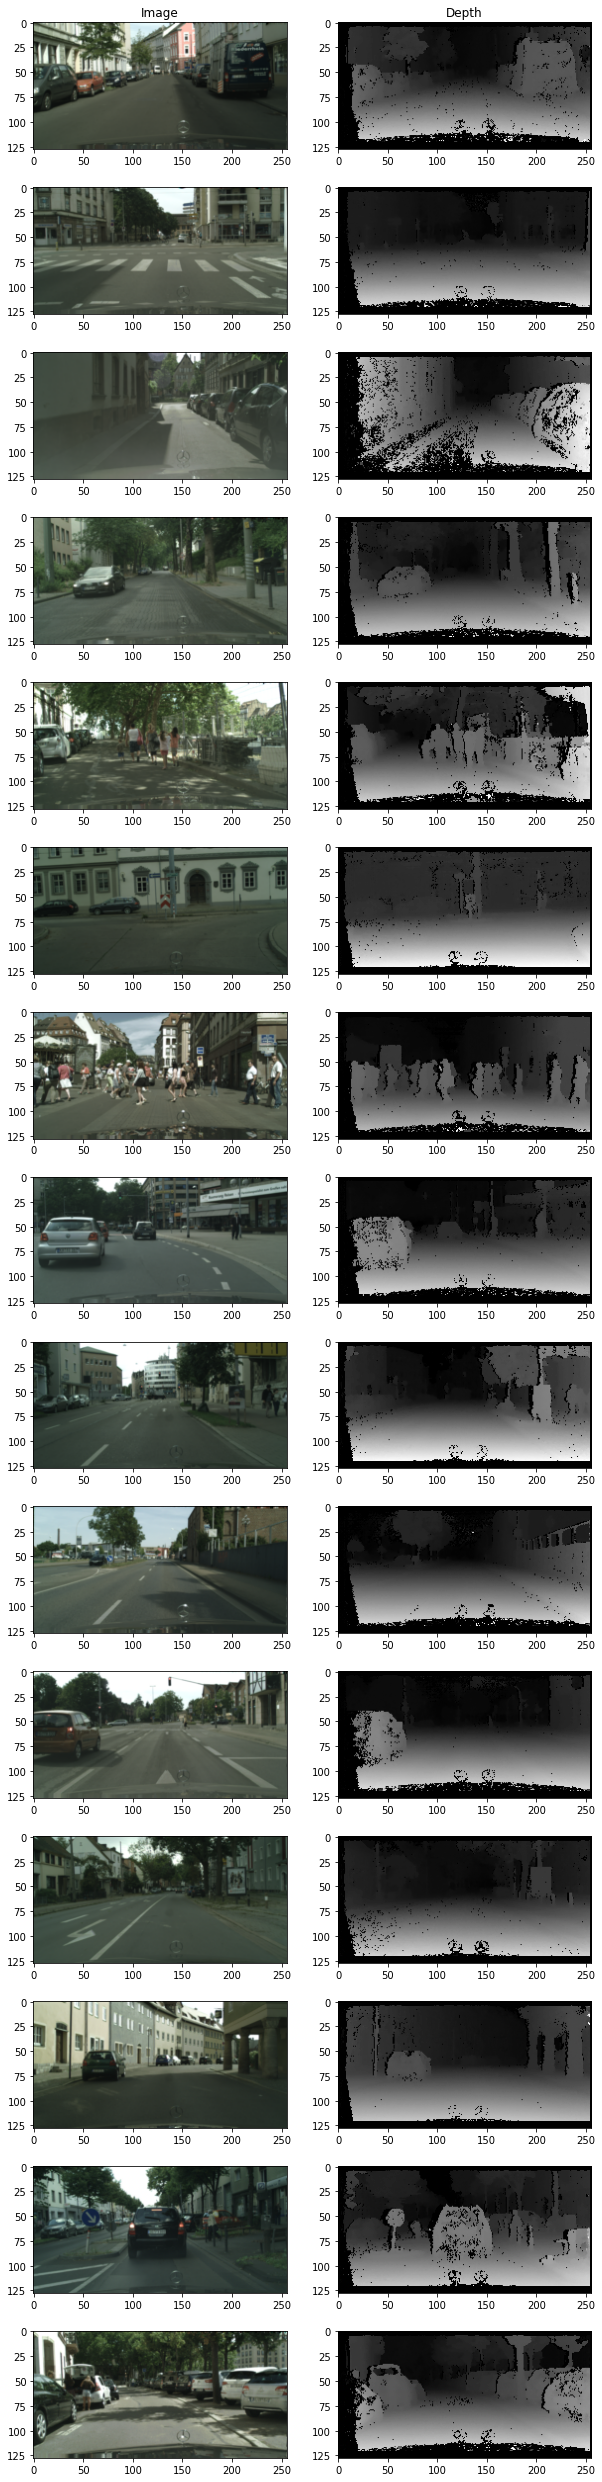

In [12]:
visualize_batch(batch, 15)

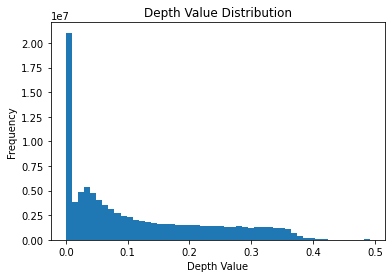

In [13]:
plot_depth_distribution(train_dataset)

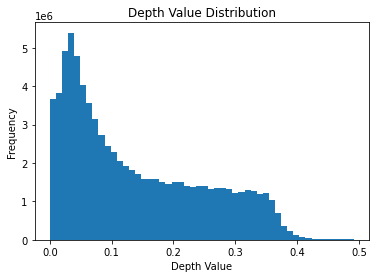

In [14]:
plot_depth_distribution(train_dataset, drop_zeros=True)

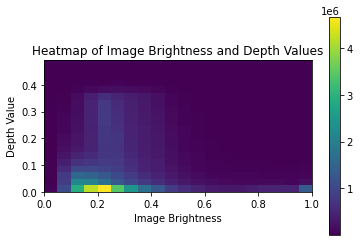

In [15]:
plot_image_depth_heatmap(train_dataset)

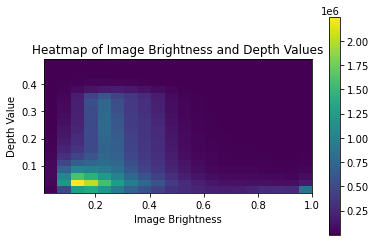

In [16]:
plot_image_depth_heatmap(train_dataset, drop_zeros=True)